In [26]:
import numpy as np
import pandas as pd
import pathlib
import dotenv
import os
import matplotlib.pyplot as plt

from preference_learning import load_dataframe, MLPWrapper

In [2]:
dotenv.load_dotenv()
X_train, X_test, y_train, y_test = load_dataframe(mode="split")
model = MLPWrapper()
path = pathlib.Path(os.getenv("PROJECT_PATH")) / "models" / "ann.pt"
model.load_model(path)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Now, get the indices ordered by the difference
idx = np.argsort(abs(y_pred_proba[:, 1] - 0.5))
idx

array([ 10,  37,  45, 121, 302, 176, 288, 161,  36, 203, 126, 219, 184,
       330,  35, 311, 295,  80, 207, 278, 310,  17, 132, 220,  89, 287,
        49, 194, 116, 151,  84,  75, 289, 145, 169, 141, 122, 137, 274,
       111, 123, 333,  70,  64, 331,  28, 312, 170,  74,  19, 105, 120,
        59, 265,  91,  22, 251, 250, 249, 234, 248, 242, 235, 245, 246,
       243, 237, 241, 238, 240, 244, 239, 247, 236,   0, 232, 210, 209,
       208, 206, 205, 204, 202, 201, 200, 199, 198, 197, 196, 195, 193,
       211, 233, 212, 214, 231, 230, 229, 228, 227, 226, 225, 252, 223,
       222, 221, 218, 217, 216, 215, 213, 224, 269, 254, 320, 319, 318,
       317, 316, 315, 314, 313, 309, 308, 307, 306, 305, 304, 303, 321,
       322, 323, 324, 343, 342, 341, 340, 339, 338, 337, 301, 336, 334,
       332, 329, 328, 327, 326, 325, 335, 253, 300, 298, 271, 270, 192,
       268, 266, 264, 263, 262, 261, 260, 259, 258, 257, 256, 255, 272,
       273, 275, 276, 297, 296, 294, 293, 292, 291, 290, 299, 28

In [3]:
y_pred_proba[idx]

array([[0.5007974 , 0.49920258],
       [0.5256549 , 0.4743451 ],
       [0.5293298 , 0.4706702 ],
       [0.5305513 , 0.46944866],
       [0.5319927 , 0.46800733],
       [0.5549894 , 0.4450106 ],
       [0.4424733 , 0.5575267 ],
       [0.44080645, 0.55919355],
       [0.56003773, 0.43996224],
       [0.43790132, 0.5620987 ],
       [0.5865671 , 0.4134329 ],
       [0.58823514, 0.41176483],
       [0.40860474, 0.59139526],
       [0.61049175, 0.38950822],
       [0.613976  , 0.38602403],
       [0.38546425, 0.61453575],
       [0.38293308, 0.6170669 ],
       [0.38156617, 0.61843383],
       [0.64084476, 0.35915524],
       [0.64201224, 0.3579878 ],
       [0.35631782, 0.6436822 ],
       [0.64461726, 0.35538274],
       [0.6701952 , 0.3298048 ],
       [0.32692415, 0.67307585],
       [0.69305646, 0.3069435 ],
       [0.6988622 , 0.3011378 ],
       [0.3010754 , 0.6989246 ],
       [0.71736455, 0.28263548],
       [0.279774  , 0.720226  ],
       [0.27875245, 0.72124755],
       [0.

In [4]:
y_pred[idx]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [5]:
X_test.iloc[idx[:3]]

,buying,maint,doors,persons,lug_boot,safety
10,0.0,0.666667,0.666667,1.0,0.5,1.0
37,0.0,0.000000,0.333333,1.0,1.0,0.0
45,0.0,0.666667,0.333333,1.0,0.5,1.0


In [22]:
print(model.predict(pd.Series([0,1/3,2/3,1,0.5,1]))) # maintenance 2/3 -> 1 then 0 -> 1
print(model.predict(pd.Series([0,0,1/3,1,1,0.5]))) # safety 0 -> 0.5 then 0 -> 1
print(model.predict(pd.Series([0,1/3,2/3,1,0.5,1]))) # maintenance 2/3 -> 1 then 0 -> 1

[[1]]
[[1]]
[[1]]


In [23]:
y_pred[idx[:3]]

array([[0],
       [0],
       [0]])

In [24]:
y_test.iloc[idx[:3]]

,class
10,1
37,0
45,1


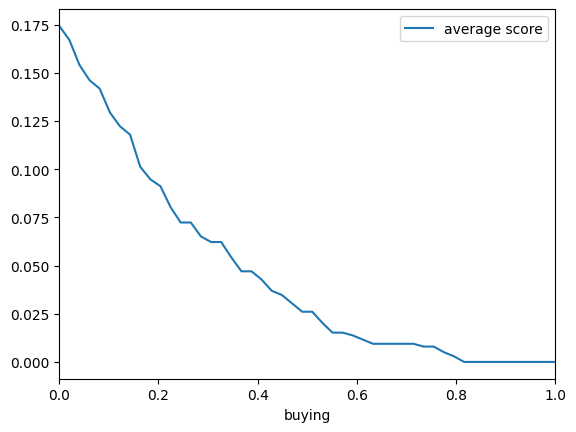

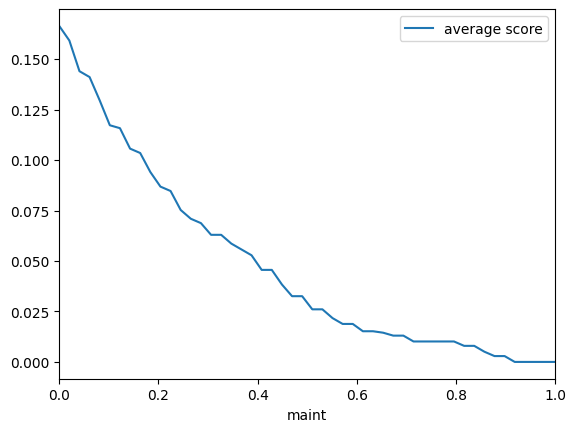

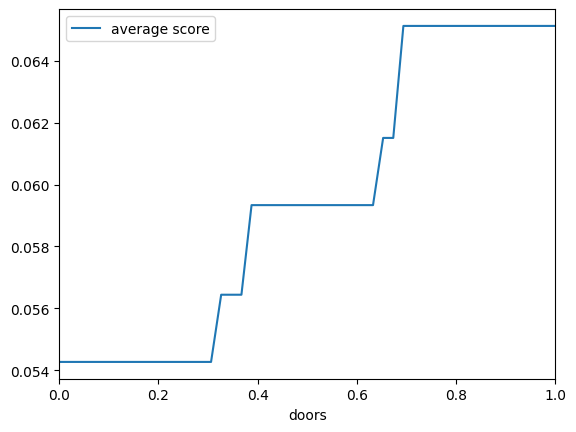

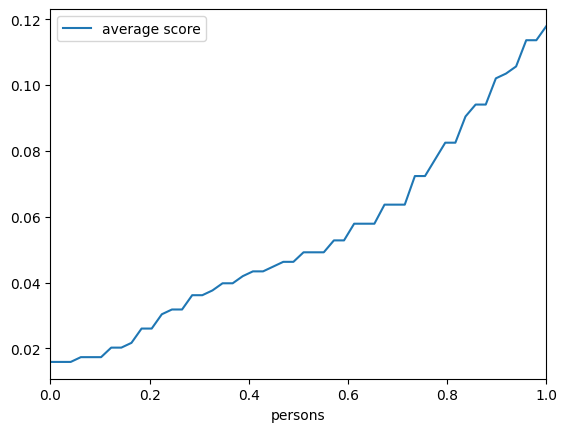

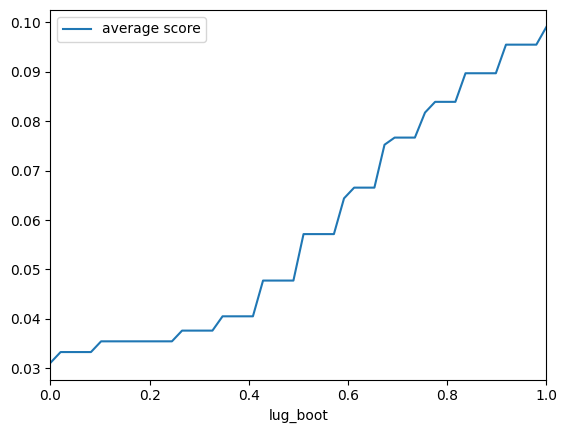

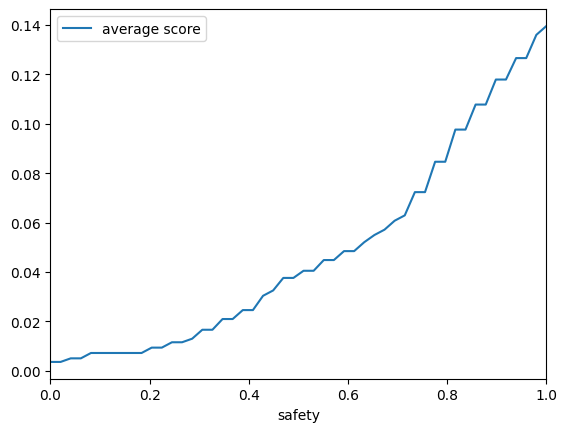

In [27]:
grid = np.linspace(0,1,50)
criteria_nr = len(X_train.columns)
for c in range(criteria_nr):
    y_pred = np.zeros(len(grid))
    for i, val in enumerate(grid):
        X_temp = X_train.values.copy()
        X_temp[:, c] = val
        y_pred[i] = np.average(model.predict(pd.DataFrame(X_temp)))

    fig, ax = plt.subplots()
    ax.plot(grid, y_pred,  label='average score')
    ax.set_xlim(0, 1)
    ax.set_xlabel(X_train.columns[c])
    ax.legend()
    # Save the figure
    fig.savefig(f'../plots/feature_{c}_MLP.png')